In [32]:
# crop_visualization.ipynb

# Cell 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Cell 2: Load dataset
df = pd.read_csv("Crop_recommendation.csv")
df.head()

# Cell 3: Train pipeline
X = df.drop("label", axis=1)
y_raw = df["label"]

le = LabelEncoder()
y = le.fit_transform(y_raw)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])

pipeline.fit(X, y)

print(" Model trained successfully")




 Model trained successfully


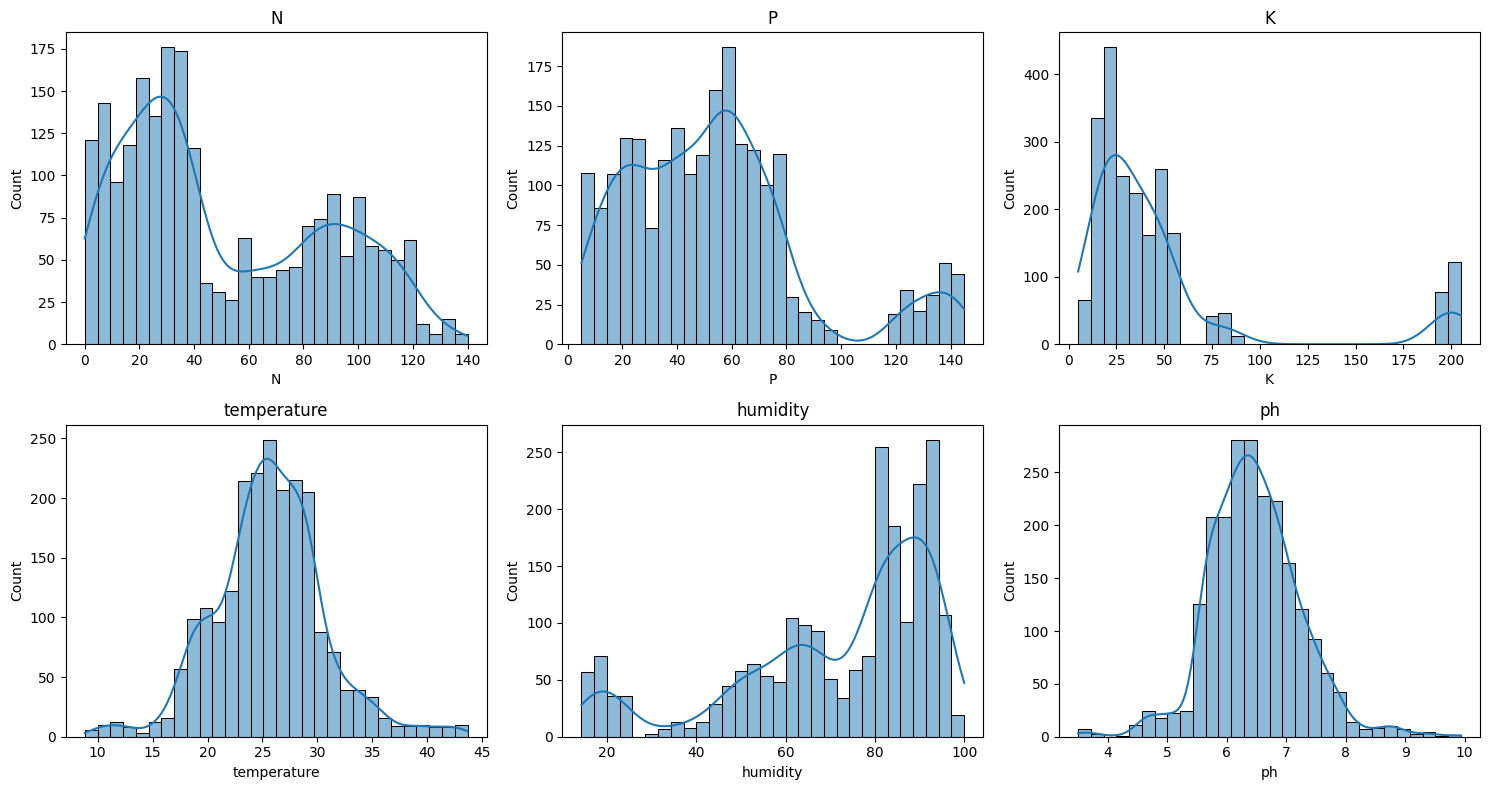

/tmp/ipython-input-1043013964.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")


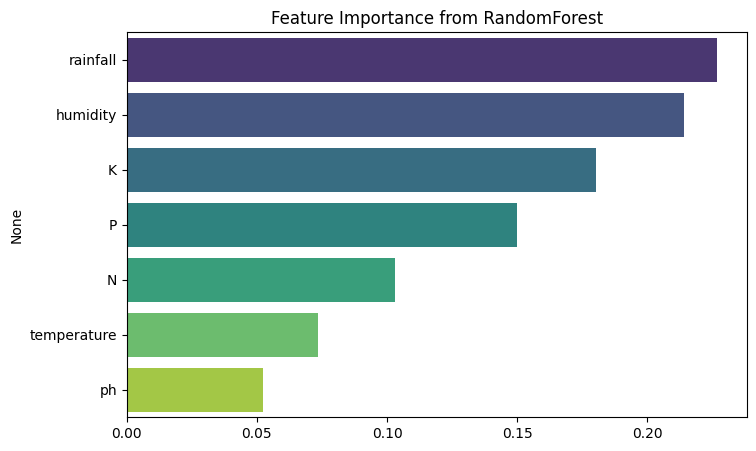

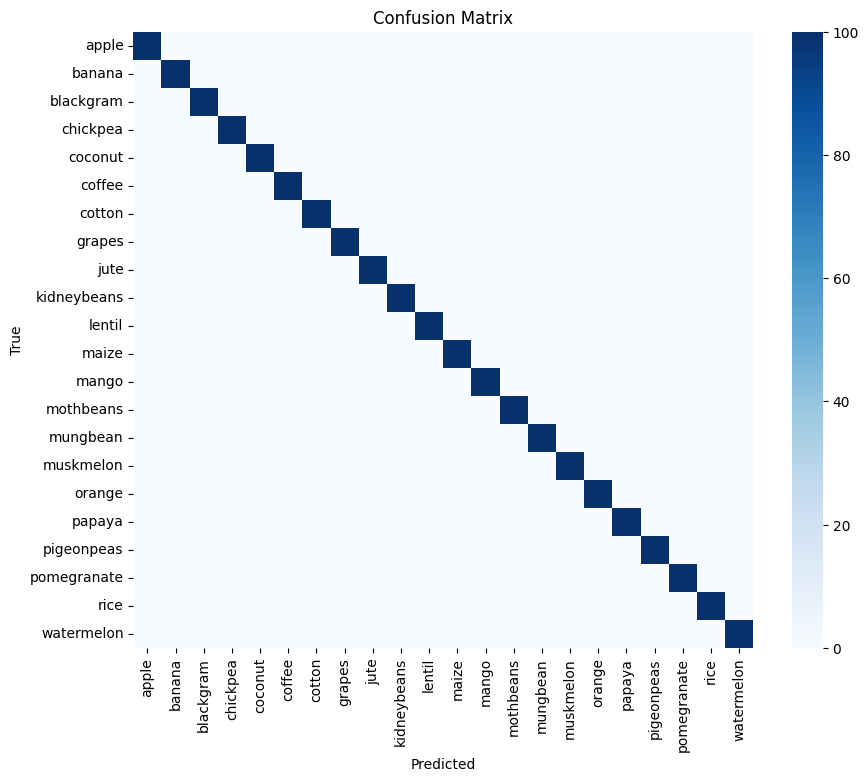

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00       100
      banana       1.00      1.00      1.00       100
   blackgram       1.00      1.00      1.00       100
    chickpea       1.00      1.00      1.00       100
     coconut       1.00      1.00      1.00       100
      coffee       1.00      1.00      1.00       100
      cotton       1.00      1.00      1.00       100
      grapes       1.00      1.00      1.00       100
        jute       1.00      1.00      1.00       100
 kidneybeans       1.00      1.00      1.00       100
      lentil       1.00      1.00      1.00       100
       maize       1.00      1.00      1.00       100
       mango       1.00      1.00      1.00       100
   mothbeans       1.00      1.00      1.00       100
    mungbean       1.00      1.00      1.00       100
   muskmelon       1.00      1.00      1.00       100
      orange       1.00      1.00      1.00       100
      papaya       1.00    

In [31]:

# Cell 5: Feature distributions
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()
for i, col in enumerate(["N", "P", "K", "temperature", "humidity", "ph"]):
    sns.histplot(df[col], kde=True, bins=30, ax=axs[i])
    axs[i].set_title(col)
plt.tight_layout()
plt.show()

# Cell 6: Feature importance
importances = pipeline.named_steps["clf"].feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance from RandomForest")
plt.show()

# Cell 7: Confusion Matrix
y_pred = pipeline.predict(X)
cm = confusion_matrix(y, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Cell 8: Classification Report
print(classification_report(y, y_pred, target_names=le.classes_))

In [30]:
# Cell 4: Predict for a sample input
sample = pd.DataFrame([[90, 42, 43, 20.8, 82.0, 6.5, 202.9]],
                      columns=["N","P","K","temperature","humidity","ph","rainfall"])
pred_num = pipeline.predict(sample)[0]
pred_crop = le.inverse_transform([pred_num])[0]
print("Prediction:", pred_crop)

Prediction: rice


In [23]:
import pickle

with open('crop_model.pkl', 'wb') as f:
    pickle.dump(model, f)
